In [342]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline
font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc("font",family=font_name)

In [343]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import mglearn

In [344]:
basic_data = pd.DataFrame(columns={'Model','Train score','Test score'})
more_treated_data = pd.DataFrame(columns={'Model','Train score','Test score'})
Train_score = []
Test_score = []
Model = []

In [345]:
dicaprio_1 = [3., 1., 19., 0., 0., 5., 3.,2.]
winslet_1 = [1., 0., 17., 1., 1., 100., 3, 3.]
dicaprio = [3., 1., 19., 0., 0., 5.]
winslet = [1., 0., 17., 1., 1., 100.]

# titanic 데이터 가져 오기 및 정제 

In [346]:
train_titanic_1 = pd.read_csv('../data/train_titanic_1.csv', index_col= 0)
train_titanic_2 = pd.read_csv('../data/train_titanic_2.csv', index_col= 0)
raw_data = pd.read_excel('../data/titanic.xls')
conversion_rare = lambda x: x.split(',')[1].split('.')[0].strip()
raw_data['title'] = raw_data['name'].map(conversion_rare)

titles = raw_data['title'].unique()
raw_data['title'] = raw_data['title'].replace('Mlle', 'Miss')
raw_data['title'] = raw_data['title'].replace('Ms', 'Miss')
raw_data['title'] = raw_data['title'].replace('Mme', 'Mrs')

Rare = ['Lady', 'the Countess', 'Countess', 'Capt', 'Master', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']

for each in Rare:
    raw_data['title'] = raw_data['title'].replace(each, 'Rare')

raw_data['age_cat'] = pd.cut(raw_data['age'], bins=[0, 3, 7, 15, 30, 60, 100],
                            include_lowest = True, labels = ['baby', 'children', 'teenage', 'young', 'adult', 'old'])

raw_data = raw_data[raw_data['age'].notnull()]
raw_data = raw_data[raw_data['sibsp'].notnull()]
raw_data = raw_data[raw_data['parch'].notnull()]
raw_data = raw_data[raw_data['fare'].notnull()]
raw_data = raw_data[raw_data['age_cat'].notnull()]
raw_data = raw_data[raw_data['title'].notnull()]

* train_titanic_2 는 age_cat, title 를 수치화 해서 추가

In [347]:
train_titanic_1.head(2)

,pclass,sex,age,sibsp,parch,fare
0,1.0,0.0,29.0000,0.0,0.0,211.3375
1,1.0,1.0,0.9167,1.0,2.0,151.5500


In [348]:
train_titanic_2.head(2)

,pclass,sex,age,sibsp,parch,fare,age_cat_num,title_num
0,1.0,0.0,29.0000,0.0,0.0,211.3375,3.0,0.0
1,1.0,1.0,0.9167,1.0,2.0,151.5500,0.0,1.0


In [349]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    train_titanic_1, raw_data[['survived']],
    test_size = 0.1, random_state = 13)

X1_train, X1_test, y1_train, y1_test = train_test_split(
    train_titanic_2, raw_data[['survived']],
    test_size = 0.1, random_state = 13)

* 트레인, 테스트 셋을 feature 갯수에 따라 나뉘어 할당

In [350]:
X_train = X_train.reset_index()
X_train = X_train.drop(['index'], axis = 1)

X_test = X_test.reset_index()
X_test = X_test.drop(['index'], axis = 1)

y_train = y_train.reset_index()
y_train = y_train.drop(['index'], axis = 1)

y_test = y_test.reset_index()
y_test = y_test.drop(['index'], axis = 1)

X1_train = X1_train.reset_index()
X1_train = X1_train.drop(['index'], axis = 1)

X1_test = X1_test.reset_index()
X1_test = X1_test.drop(['index'], axis = 1)

y1_train = y1_train.reset_index()
y1_train = y1_train.drop(['index'], axis = 1)

y1_test = y1_test.reset_index()
y1_test = y1_test.drop(['index'], axis = 1)

# 1. Decision Tree

* max_depth를 5로 할당하고, 각 feature의 갯수마다 스코어가 어떻게 다른지 확인 해보기 

In [351]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=3, random_state=13)
tree_clf.fit(X_train, y_train)

tree_clf1 = DecisionTreeClassifier(max_depth=3, random_state=13)
tree_clf1.fit(X1_train, y1_train)

print('기본 titanic 정제 데이터 점수:')
print('Train Score:{}'.format(tree_clf.score(X_train, y_train)))
print('Test Score: {}'.format(tree_clf.score(X_test, y_test)))
Model.append('Decision Tree')
Train_score.append(format(tree_clf.score(X_train, y_train)))
Test_score.append(format(tree_clf.score(X_test, y_test)))

print('\n\ntitanic 데이터에  age_cat, title 수치화 점수 ')

print('Train Score:{}'.format(tree_clf1.score(X1_train, y1_train)))
print('Test Score: {}'.format(tree_clf1.score(X1_test, y1_test)))

기본 titanic 정제 데이터 점수:
Train Score:0.8117021276595745
Test Score: 0.8476190476190476


titanic 데이터에  age_cat, title 수치화 점수 
Train Score:0.8117021276595745
Test Score: 0.8476190476190476


* 점수의 차이가 없기 때문에, 각 특성별로 Decision Tree에 적용되는 특성 중요도 살펴보기 

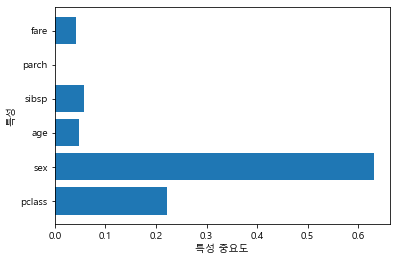

In [352]:
def plot_feature_importance_titanic(model, train):
    n_feature = train.shape[1]
    plt.barh(np.arange(n_feature), model.feature_importances_,align = 'center')
    plt.yticks(np.arange(n_feature), train.columns)
    plt.xlabel('특성 중요도')
    plt.ylabel('특성')

plot_feature_importance_titanic(tree_clf, X_train)


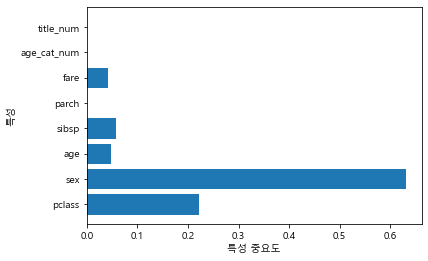

In [353]:
plot_feature_importance_titanic(tree_clf1, X1_train)

## - 결론적으로 age_cat, title feature은 의사결정트리에서 중요도가 없다 -> 생존확률을 예측하는데 고려대상에서 제외

# - 생존확률 보기 

In [354]:
def isSurvived(name,person, model):
    isSurvive = 'not survived' if model.predict([person])[0] == 0 else 'survived'
    print(name, 'is', isSurvive, '-->', max(model.predict_proba([person])[0]))

print('기본 titanic 정제 데이터에서 생존확률')
isSurvived('Dicaprio', dicaprio, tree_clf)
isSurvived('Winslet', winslet, tree_clf)

print('\n\n titanic 정제 및 추가 데이터에서 생존확률 ')
isSurvived('Dicaprio', dicaprio_1, tree_clf1)
isSurvived('Winslet', winslet_1, tree_clf1)

기본 titanic 정제 데이터에서 생존확률
Dicaprio is not survived --> 0.875
Winslet is survived --> 0.9758064516129032


 titanic 정제 및 추가 데이터에서 생존확률 
Dicaprio is not survived --> 0.875
Winslet is survived --> 0.9758064516129032


# 2. 랜덤 포레스트 

In [355]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 200, random_state = 0)
forest.fit(X_train, y_train)

forest1 = RandomForestClassifier(n_estimators = 200, random_state = 0)
forest1.fit(X1_train, y1_train)

C:\Users\A\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\A\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [356]:
print('기본 titanic 정제 데이터 점수:')
print('Train Score:{}'.format(forest.score(X_train, y_train)))
print('Test Score: {}'.format(forest.score(X_test, y_test)))
Model.append('Random Forest')
Train_score.append(format(forest.score(X_train, y_train)))
Test_score.append(format(forest.score(X_test, y_test)))

print('\n\ntitanic 데이터에  age_cat, title 수치화 점수 ')

print('Train Score:{}'.format(forest1.score(X1_train, y1_train)))
print('Test Score: {}'.format(forest1.score(X1_test, y1_test)))

기본 titanic 정제 데이터 점수:
Train Score:0.9819148936170212
Test Score: 0.780952380952381


titanic 데이터에  age_cat, title 수치화 점수 
Train Score:0.9840425531914894
Test Score: 0.780952380952381


In [357]:
print('기본 titanic 정제 데이터에서 생존확률')
isSurvived('Dicaprio', dicaprio, forest)
isSurvived('Winslet', winslet, forest)

print('\n\n titanic 정제 및 추가 데이터에서 생존확률 ')
isSurvived('Dicaprio', dicaprio_1, forest1)
isSurvived('Winslet', winslet_1, forest1)

기본 titanic 정제 데이터에서 생존확률
Dicaprio is not survived --> 1.0
Winslet is survived --> 0.995


 titanic 정제 및 추가 데이터에서 생존확률 
Dicaprio is not survived --> 0.99
Winslet is survived --> 0.97


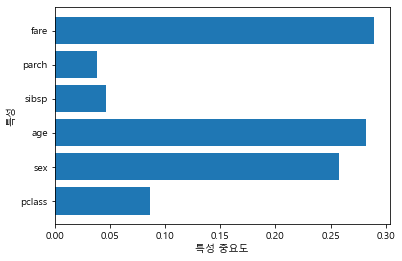

In [358]:
plot_feature_importance_titanic(forest, X_train)

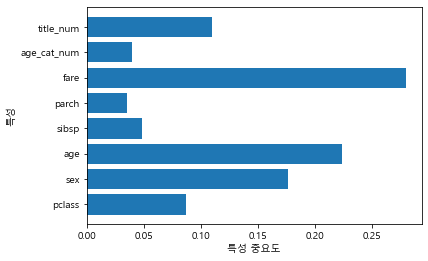

In [359]:
plot_feature_importance_titanic(forest1, X1_train)

# 3. knn_ 알고리즘 

In [360]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 5)
clf.fit(X_train, y_train)

clf1 = KNeighborsClassifier(n_neighbors = 5)
clf1.fit(X1_train, y1_train)

C:\Users\A\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\A\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### - knn_알고리즘 정확도 점수

In [361]:
print('기본 titanic 정제 데이터 정확도 점수:')
print('Train Score:{}'.format(clf.score(X_train, y_train)))
print('Test Score: {}'.format(clf.score(X_test, y_test)))
Model.append('KNN')
Train_score.append(format(clf.score(X_train, y_train)))
Test_score.append(format(clf.score(X_test, y_test)))

print('\n\ntitanic 데이터에  age_cat, title 수치화 정확도 점수 ')

print('Train Score:{}'.format(clf1.score(X1_train, y1_train)))
print('Test Score: {}'.format(clf1.score(X1_test, y1_test)))

기본 titanic 정제 데이터 정확도 점수:
Train Score:0.7723404255319148
Test Score: 0.7333333333333333


titanic 데이터에  age_cat, title 수치화 정확도 점수 
Train Score:0.7787234042553192
Test Score: 0.7238095238095238


In [362]:
print('기본 titanic 정제 데이터에서 생존확률 \n')
isSurvived('Dicaprio', dicaprio, clf)
isSurvived('Winslet', winslet, clf)

print('\n\n titanic 정제 및 추가 데이터에서 생존확률 ')
isSurvived('Dicaprio', dicaprio_1, clf1)
isSurvived('Winslet', winslet_1, clf1)

기본 titanic 정제 데이터에서 생존확률 

Dicaprio is not survived --> 1.0
Winslet is survived --> 0.6


 titanic 정제 및 추가 데이터에서 생존확률 
Dicaprio is not survived --> 1.0
Winslet is survived --> 0.6


# 4. 선형 분류 알고리즘 -LogisticRegression

In [363]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X_train, y_train)
logreg1 = LogisticRegression().fit(X1_train, y1_train)

print('기본 titanic 정제 데이터 정확도 점수:')
print('Train Score:{}'.format(logreg.score(X_train, y_train)))
print('Test Score: {}'.format(logreg.score(X_test, y_test)))
Model.append('LogisticRegression')
Train_score.append(format(logreg.score(X_train, y_train)))
Test_score.append(format(logreg.score(X_test, y_test)))


print('\n\ntitanic 데이터에  age_cat, title 수치화 정확도 점수 ')

print('Train Score:{}'.format(logreg1.score(X1_train, y1_train)))
print('Test Score: {}'.format(logreg1.score(X1_test, y1_test)))

기본 titanic 정제 데이터 정확도 점수:
Train Score:0.7840425531914894
Test Score: 0.8095238095238095


titanic 데이터에  age_cat, title 수치화 정확도 점수 
Train Score:0.8
Test Score: 0.819047619047619


C:\Users\A\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\A\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [364]:
print('기본 titanic 정제 데이터에서 생존확률')
isSurvived('Dicaprio', dicaprio, logreg)
isSurvived('Winslet', winslet, logreg)

print('\n\n titanic 정제 및 추가 데이터에서 생존확률 ')
isSurvived('Dicaprio', dicaprio_1, logreg1)
isSurvived('Winslet', winslet_1, logreg1)

기본 titanic 정제 데이터에서 생존확률
Dicaprio is not survived --> 0.8484388317028668
Winslet is survived --> 0.9146979007561423


 titanic 정제 및 추가 데이터에서 생존확률 
Dicaprio is not survived --> 0.8457563538351794
Winslet is survived --> 0.9311626350269677


# 5. SVM 

In [365]:
from sklearn.svm import SVC
svc =SVC()
svc.fit(X_train, y_train)

svc1 =SVC()
svc1.fit(X1_train, y1_train)

C:\Users\A\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\A\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### -데이터셋 전처리전 정확도 검사

In [366]:
print('기본 titanic 정제 데이터 정확도 점수:')
print('Train Score:{}'.format(svc.score(X_train, y_train)))
print('Test Score: {}'.format(svc.score(X_test, y_test)))

print('\n\ntitanic 데이터에  age_cat, title 수치화 정확도 점수 ')

print('Train Score:{}'.format(svc1.score(X1_train, y1_train)))
print('Test Score: {}'.format(svc1.score(X1_test, y1_test)))

기본 titanic 정제 데이터 정확도 점수:
Train Score:0.8872340425531915
Test Score: 0.7333333333333333


titanic 데이터에  age_cat, title 수치화 정확도 점수 
Train Score:0.8882978723404256
Test Score: 0.7523809523809524


## SVM을 위한 데이터셋 전처리 후 정확도 검사

In [367]:
#g훈련 세트에서 특성별 최솟값 계산
min_on_training = X_train.min(axis =0)
min_on_training1 = X1_train.min(axis =0)

#훈련 세트에서 특성별 (최대값 - 최소값) 범위 계산
range_on_training = (X_train - min_on_training).max(axis = 0)
range_on_training1 = (X1_train - min_on_training1).max(axis = 0)

# 훈련데이터에 최솟값을 빼고 범위로 나누면 
# 각 특성에 대해 최솟값은 0 최댓값은 1입니다.
X_train_scaled = (X_train - min_on_training) /range_on_training
X1_train_scaled = (X1_train - min_on_training1) /range_on_training1

X_test_scaled = (X_test - min_on_training) / range_on_training
X1_test_scaled = (X1_test - min_on_training1) / range_on_training1


In [368]:
svc =SVC()
svc.fit(X_train_scaled, y_train)

svc1 =SVC()
svc1.fit(X1_train_scaled, y1_train)

print('기본 titanic 정제 데이터 정확도 점수:')
print('Train Score:{}'.format(svc.score(X_train_scaled, y_train)))
print('Test Score: {}'.format(svc.score(X_test_scaled, y_test)))

Model.append('SVC')
Train_score.append(format(svc.score(X_train_scaled, y_train)))
Test_score.append(format(svc.score(X_test_scaled, y_test)))


print('\n\ntitanic 데이터에  age_cat, title 수치화 정확도 점수 ')

print('Train Score:{}'.format(svc1.score(X1_train_scaled, y1_train)))
print('Test Score: {}'.format(svc1.score(X1_test_scaled, y1_test)))

C:\Users\A\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\A\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


기본 titanic 정제 데이터 정확도 점수:
Train Score:0.7755319148936171
Test Score: 0.8095238095238095


titanic 데이터에  age_cat, title 수치화 정확도 점수 
Train Score:0.7755319148936171
Test Score: 0.8095238095238095


In [369]:
basic_data['Model'] = Model
basic_data['Train score'] = Train_score
basic_data['Train score'] = basic_data['Train score'].astype(float)
basic_data['Test score'] = Test_score
basic_data['Test score'] = basic_data['Test score'].astype(float)

In [370]:
basic_data

,Train score,Test score,Model
0,0.811702,0.847619,Decision Tree
1,0.981915,0.780952,Random Forest
2,0.772340,0.733333,KNN
3,0.784043,0.809524,LogisticRegression
4,0.775532,0.809524,SVC


(0.0, 1.0)

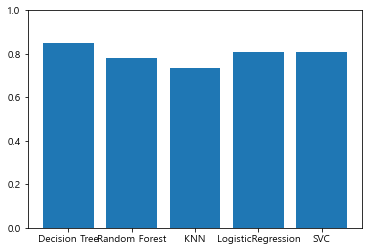

In [371]:
plt.bar(basic_data['Model'], basic_data['Test score'])
plt.ylim(0,1)